### Setup the Spark VM and complete the below assignment

Objective:- Build a ML model to predict the employee compensation.
The application should be modelled using Spark.

You can refer to the below links for spark commands:- 
- https://spark.apache.org/docs/latest/ml-pipeline.html

- https://github.com/spark-in-action/first-edition

- https://github.com/FavioVazquez/first_spark_model

# Predicting Employee Compensation

## Data Dictionary
<br>**Year Type** - Fiscal (July through June) or Calendar (January through December)
<br>**Year** - An accounting period of 12 months. The City and County of San Francisco operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.
<br>**Organization Group Code** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,Fire, Adult Probation, District Attorney, and Sheriff.
<br> **Organization Group** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,
Fire, Adult Probation, District Attorney, and Sheriff.
<br>**Department Code** - Departments are the primary organizational unit used by the Cityand County of San Francisco. Examples include Recreation and
Parks, Public Works, and the Police Department.
<br>**Department Code** - Departments are the primary organizational unit used by the City and County of San Francisco. Examples include Recreation and Parks, Public Works, and the Police Department.
<br>**Union Code** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Union** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Job Family Code** Job Family combines similar Jobs into meaningful groups.
<br>**Job Family** Job Family combines similar Jobs into meaningful groups.
<br>**Employee Identifier** Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset. The column does not appear on the
Employee Compensation report hosted on openbook.sfgov.org,
but that report does show one row for each employee. Employee
ID has been included here to allow users to reconstruct the
original report. Note that each employee’s identifier will change
each time this dataset is updated, so comparisons by employee
across multiple versions of the dataset are not possible.
<br>**Salaries** - Normal salaries paid to permanent or temporary City employees.
<br>**Overtime** - Amounts paid to City employees working in excess of 40 hours
per week.
<br>**Other Salaries** - Various irregular payments made to City employees including premium pay, incentive pay, or other one-time payments. Total Salary Number The sum of all salaries paid to City employees.
<br>**Retirement** City contributions to employee retirement plans.
<br>**Health/Dental** City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits.
<br>**Other Benefits** Mandatory benefits paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment
insurance premiums, and minor discretionary benefits not included in the above categories.
<br>**Total Benefits** The sum of all benefits paid to City employees.
<br>**Total Compensation** The sum of all salaries and benefits paid to City employees.

Read the data and answer the following questions to predict employee compensation

## 1. Read the Data

In [1]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 6.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=e31e1a5af8a204432a9742a0cbacd42486a65a8088821752708ffd1d719ce03b
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [2]:
pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#importing the libraries and creating the spark session
import findspark
findspark.init()
findspark.find()

'/usr/local/lib/python3.8/dist-packages/pyspark'

In [4]:
from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F
from pyspark import SparkFiles


spark = SparkSession \
       .builder \
       .appName("Employee Compensation") \
       .getOrCreate()

spark

In [5]:
#Reading the data
url='https://raw.githubusercontent.com/smaddula82/Demo/master/Employee_Compensation.csv'
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("Employee_Compensation.csv"),inferSchema=True, header= True)

### 1.1 Display the number of rows and columns in the dataset

In [6]:
#Number of rows
df.count()

291825

In [7]:
#Number of columns
len(df.columns)

22

### 1.2 Check the datatype of the variables

In [8]:
#Checkin the schema
df.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Organization Group Code: integer (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job Code: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



In [9]:
#Checking the data
df.show(5,False)

+---------+----+-----------------------+--------------------+---------------+------------------------------+----------+---------------------------------+---------------+-----------------------------+--------+---------------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|Organization Group  |Department Code|Department                    |Union Code|Union                            |Job Family Code|Job Family                   |Job Code|Job                        |Employee Identifier|Salaries |Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+--------------------+---------------+------------------------------+----------+---------------------------------+---------------+-----------------------------+--------+---------------------------+--------

### 2. Convert the incorrect column type into its suitable column type. And drop the redundant features

In [10]:
#Renaming the columns
df1=df.withColumnRenamed("Year Type","Year_Type").withColumnRenamed("Organization Group Code","Organization_Group_Code").\
withColumnRenamed("Organization Group","Organization_Group").withColumnRenamed("Department Code","Department_Code").\
withColumnRenamed("Union Code","Union_Code").withColumnRenamed("Job Family Code","Job_Family_Code").\
withColumnRenamed("Job Family","Job_Family").withColumnRenamed("Job Code","Job_Code").withColumnRenamed("Employee Identifier","Employee_Identifier").\
withColumnRenamed("Other Salaries","Other_Salaries").withColumnRenamed("Total Salary","Total_Salary").withColumnRenamed("Health/Dental","Health_Dental").\
withColumnRenamed("Other Benefits","Other_Benefits").withColumnRenamed("Total Benefits","Total_Benefits").withColumnRenamed("Total Compensation","Total_Compensation")


In [11]:
#checking the data after renaming
df1.show(5,False)

+---------+----+-----------------------+--------------------+---------------+------------------------------+----------+---------------------------------+---------------+-----------------------------+--------+---------------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year_Type|Year|Organization_Group_Code|Organization_Group  |Department_Code|Department                    |Union_Code|Union                            |Job_Family_Code|Job_Family                   |Job_Code|Job                        |Employee_Identifier|Salaries |Overtime|Other_Salaries|Total_Salary|Retirement|Health_Dental|Other_Benefits|Total_Benefits|Total_Compensation|
+---------+----+-----------------------+--------------------+---------------+------------------------------+----------+---------------------------------+---------------+-----------------------------+--------+---------------------------+--------

In [12]:
#checking the schema
df1.printSchema()

root
 |-- Year_Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Organization_Group_Code: integer (nullable = true)
 |-- Organization_Group: string (nullable = true)
 |-- Department_Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union_Code: integer (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job_Family_Code: string (nullable = true)
 |-- Job_Family: string (nullable = true)
 |-- Job_Code: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee_Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other_Salaries: double (nullable = true)
 |-- Total_Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health_Dental: double (nullable = true)
 |-- Other_Benefits: double (nullable = true)
 |-- Total_Benefits: double (nullable = true)
 |-- Total_Compensation: double (nullable = true)



In [13]:
#Dropping Year,Organistaion Group Code,Department Code,Union Code,Job Family Code,Job Code,which are redundant, Employee Identifier which is unique number
#Also Total Salary and Total Benefits are just summation components
df2=df1.drop("Year","Organization_Group_Code","Department_Code","Union_Code","Job_Family_Code","Job_Code","Employee_Identifier","Total_Salary","Total_Benefits")

In [14]:
#checking the schema
df2.printSchema()

root
 |-- Year_Type: string (nullable = true)
 |-- Organization_Group: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job_Family: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other_Salaries: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health_Dental: double (nullable = true)
 |-- Other_Benefits: double (nullable = true)
 |-- Total_Compensation: double (nullable = true)



In [15]:
#checking the data
df2.show(5,False)

+---------+--------------------+------------------------------+---------------------------------+-----------------------------+---------------------------+---------+--------+--------------+----------+-------------+--------------+------------------+
|Year_Type|Organization_Group  |Department                    |Union                            |Job_Family                   |Job                        |Salaries |Overtime|Other_Salaries|Retirement|Health_Dental|Other_Benefits|Total_Compensation|
+---------+--------------------+------------------------------+---------------------------------+-----------------------------+---------------------------+---------+--------+--------------+----------+-------------+--------------+------------------+
|Fiscal   |Public Protection   |District Attorney             |Municipal Attorneys' Association |Legal & Court                |Attorney (Civil/Criminal)  |114473.16|0.0     |1500.0        |21025.98  |13068.8      |9368.71       |159436.65         |
|Cal

### 3. Check basic statistics and perform necessary data preprocessing (Like removing negative amount)

In [16]:
#taking the amount variables into a list
doublecols=[]
for col_name in df2.dtypes:
  # print(col_name)
  if col_name[1] == 'double':
    doublecols.append(col_name[0])

print(doublecols)

['Salaries', 'Overtime', 'Other_Salaries', 'Retirement', 'Health_Dental', 'Other_Benefits', 'Total_Compensation']


In [17]:
#checking if amount is negative in any column
for col_name in doublecols:
  print(col_name)
  print(df2.filter(F.col(col_name) < 0).count())

Salaries
79
Overtime
30
Other_Salaries
62
Retirement
422
Health_Dental
344
Other_Benefits
679
Total_Compensation
246


In [18]:
#Removing the rows having Salaries negative amount
df2 = df2.withColumn('flag', F.when(df2["Salaries"] < 0, 0).otherwise(1)).\
        filter('flag == "1"').\
        drop("flag")

In [19]:
#Removing the rows having Overtime negative amount
df2 = df2.withColumn('flag', F.when(df2["Overtime"] < 0, 0).otherwise(1)).\
        filter('flag == "1"').\
        drop("flag")

In [20]:
#Removing the rows having Other_Salaries negative amount
df2 = df2.withColumn('flag', F.when(df2["Other_Salaries"] < 0, 0).otherwise(1)).\
        filter('flag == "1"').\
        drop("flag")

In [21]:
#Removing the rows having Health_Dental negative amount
df2 = df2.withColumn('flag', F.when(df2["Health_Dental"] < 0, 0).otherwise(1)).\
        filter('flag == "1"').\
        drop("flag")

In [22]:
#Removing the rows having Other_Benefits negative amount
df2 = df2.withColumn('flag', F.when(df2["Other_Benefits"] < 0, 0).otherwise(1)).\
        filter('flag == "1"').\
        drop("flag")

In [23]:
#Removing the rows having Retirement negative amount
df2 = df2.withColumn('flag', F.when(df2["Retirement"] < 0, 0).otherwise(1)).\
        filter('flag == "1"').\
        drop("flag")

In [24]:
#checking if amount is negative in any column again
for col_name in doublecols:
  print(col_name)
  print(df2.filter(F.col(col_name) < 0).count())

Salaries
0
Overtime
0
Other_Salaries
0
Retirement
0
Health_Dental
0
Other_Benefits
0
Total_Compensation
0


### 4. Perform Missing Value Analysis

In [25]:
#checking for null values
from pyspark.sql.functions import isnull, when, count, col
df2.select([count(when(isnull(c), c)).alias(c) for c in df2.columns]).show()

+---------+------------------+----------+-----+----------+---+--------+--------+--------------+----------+-------------+--------------+------------------+
|Year_Type|Organization_Group|Department|Union|Job_Family|Job|Salaries|Overtime|Other_Salaries|Retirement|Health_Dental|Other_Benefits|Total_Compensation|
+---------+------------------+----------+-----+----------+---+--------+--------+--------------+----------+-------------+--------------+------------------+
|        0|                 0|         0|   43|        45|  0|       0|       0|             0|         0|            0|             0|                 0|
+---------+------------------+----------+-----+----------+---+--------+--------+--------------+----------+-------------+--------------+------------------+



In [26]:
#dropping the null values
df2 = df2.na.drop()

In [27]:
#checking for null values
df2.select([count(when(isnull(c), c)).alias(c) for c in df2.columns]).show()

+---------+------------------+----------+-----+----------+---+--------+--------+--------------+----------+-------------+--------------+------------------+
|Year_Type|Organization_Group|Department|Union|Job_Family|Job|Salaries|Overtime|Other_Salaries|Retirement|Health_Dental|Other_Benefits|Total_Compensation|
+---------+------------------+----------+-----+----------+---+--------+--------+--------------+----------+-------------+--------------+------------------+
|        0|                 0|         0|    0|         0|  0|       0|       0|             0|         0|            0|             0|                 0|
+---------+------------------+----------+-----+----------+---+--------+--------+--------------+----------+-------------+--------------+------------------+



In [28]:
#checking number of rows
df2.count()

290346

In [29]:
df2.dtypes

[('Year_Type', 'string'),
 ('Organization_Group', 'string'),
 ('Department', 'string'),
 ('Union', 'string'),
 ('Job_Family', 'string'),
 ('Job', 'string'),
 ('Salaries', 'double'),
 ('Overtime', 'double'),
 ('Other_Salaries', 'double'),
 ('Retirement', 'double'),
 ('Health_Dental', 'double'),
 ('Other_Benefits', 'double'),
 ('Total_Compensation', 'double')]

### 5. Exploratory Data Analysis

#### 5.1. Find top compensating organizations. Display using bar plot

In [30]:
from pyspark.sql.functions import avg,desc
df2.groupBy("Organization_Group").agg(avg("Total_Compensation").alias("Average Compensation")).sort(desc("Average Compensation")).show()


+--------------------+--------------------+
|  Organization_Group|Average Compensation|
+--------------------+--------------------+
|   Public Protection|  142451.78013578497|
|Public Works, Tra...|   98894.68105790547|
|    Community Health|   95983.98174281622|
|General Administr...|   91228.83890799127|
|Human Welfare & N...|   66688.48304309053|
|Culture & Recreation|   49340.02902766771|
|General City Resp...|  17008.011317567572|
+--------------------+--------------------+



<BarContainer object of 7 artists>

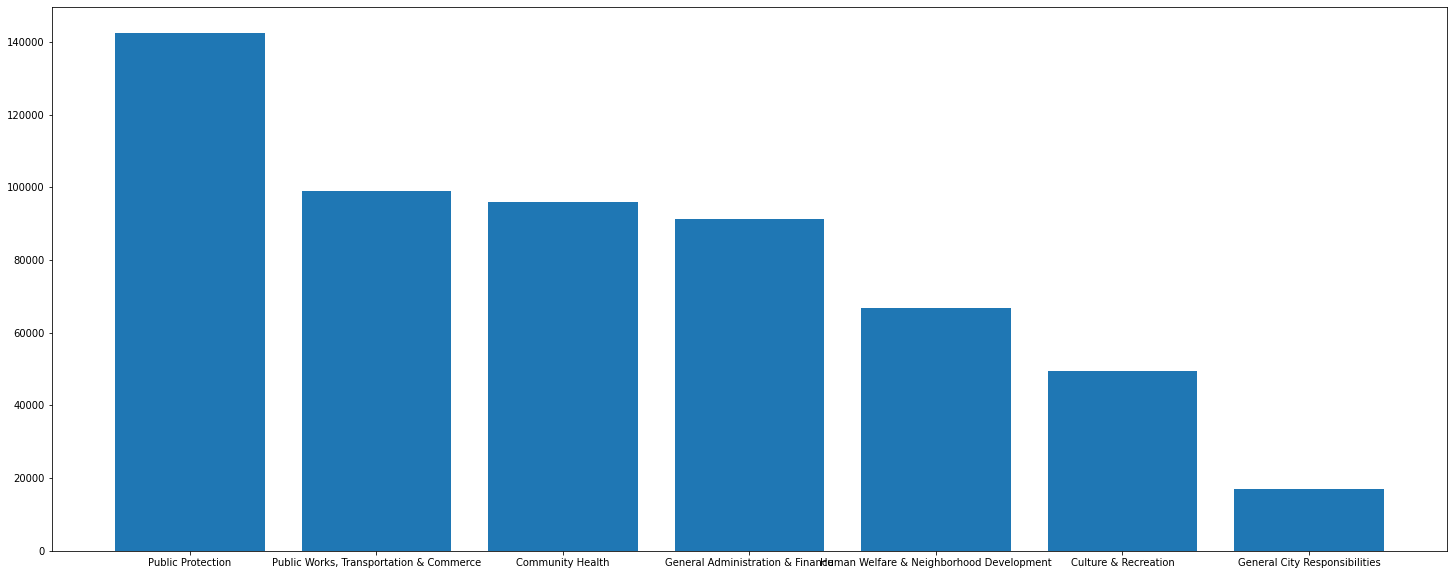

In [31]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
fig = plt.figure(figsize =(25, 10))

orgDF = df2[['Organization_Group','Total_Compensation']].groupby('Organization_Group').agg(avg('Total_Compensation').alias("Average Compensation")).sort(desc("Average Compensation")).toPandas().head(10)
# display the top 10 organisation group 
plt.bar(orgDF["Organization_Group"], orgDF["Average Compensation"])

In [32]:
#public Protection organization is the top compensating organization from above.

#### 5.2. Find top Compensating Jobs. Display using bar plot

In [33]:
df2.groupBy("Job").agg(avg("Total_Compensation").alias("Average Compensation")).sort(desc("Average Compensation")).show()

+--------------------+--------------------+
|                 Job|Average Compensation|
+--------------------+--------------------+
|     Chief Of Police|   421244.0228571429|
|Chief, Fire Depar...|   417736.6542857143|
|Gen Mgr, Public T...|   393196.4685714286|
|Chief Investment ...|   376094.1242857143|
|               Mayor|  371392.54571428575|
|         Dept Head V|   358547.0466666666|
|          Controller|  358525.73285714287|
|Adm, SFGH Medical...|   349378.3085714286|
|Dep Chf Of Dept (...|          343062.124|
|Asst Chf Of Dept ...|   342554.1519047619|
|   District Attorney|  332883.26714285713|
|       Port Director|  329839.98000000004|
|       City Attorney|   313132.2557142857|
|Executive Contrac...|  311706.67055555555|
|Emergency Medical...|  308902.96714285715|
|     Public Defender|  301998.38714285713|
|Court Executive O...|   299572.4985714285|
|Human Resources D...|           295481.29|
|Battlion Chief, F...|  293472.31103448273|
|Forensic Toxicolo...|          

<BarContainer object of 20 artists>

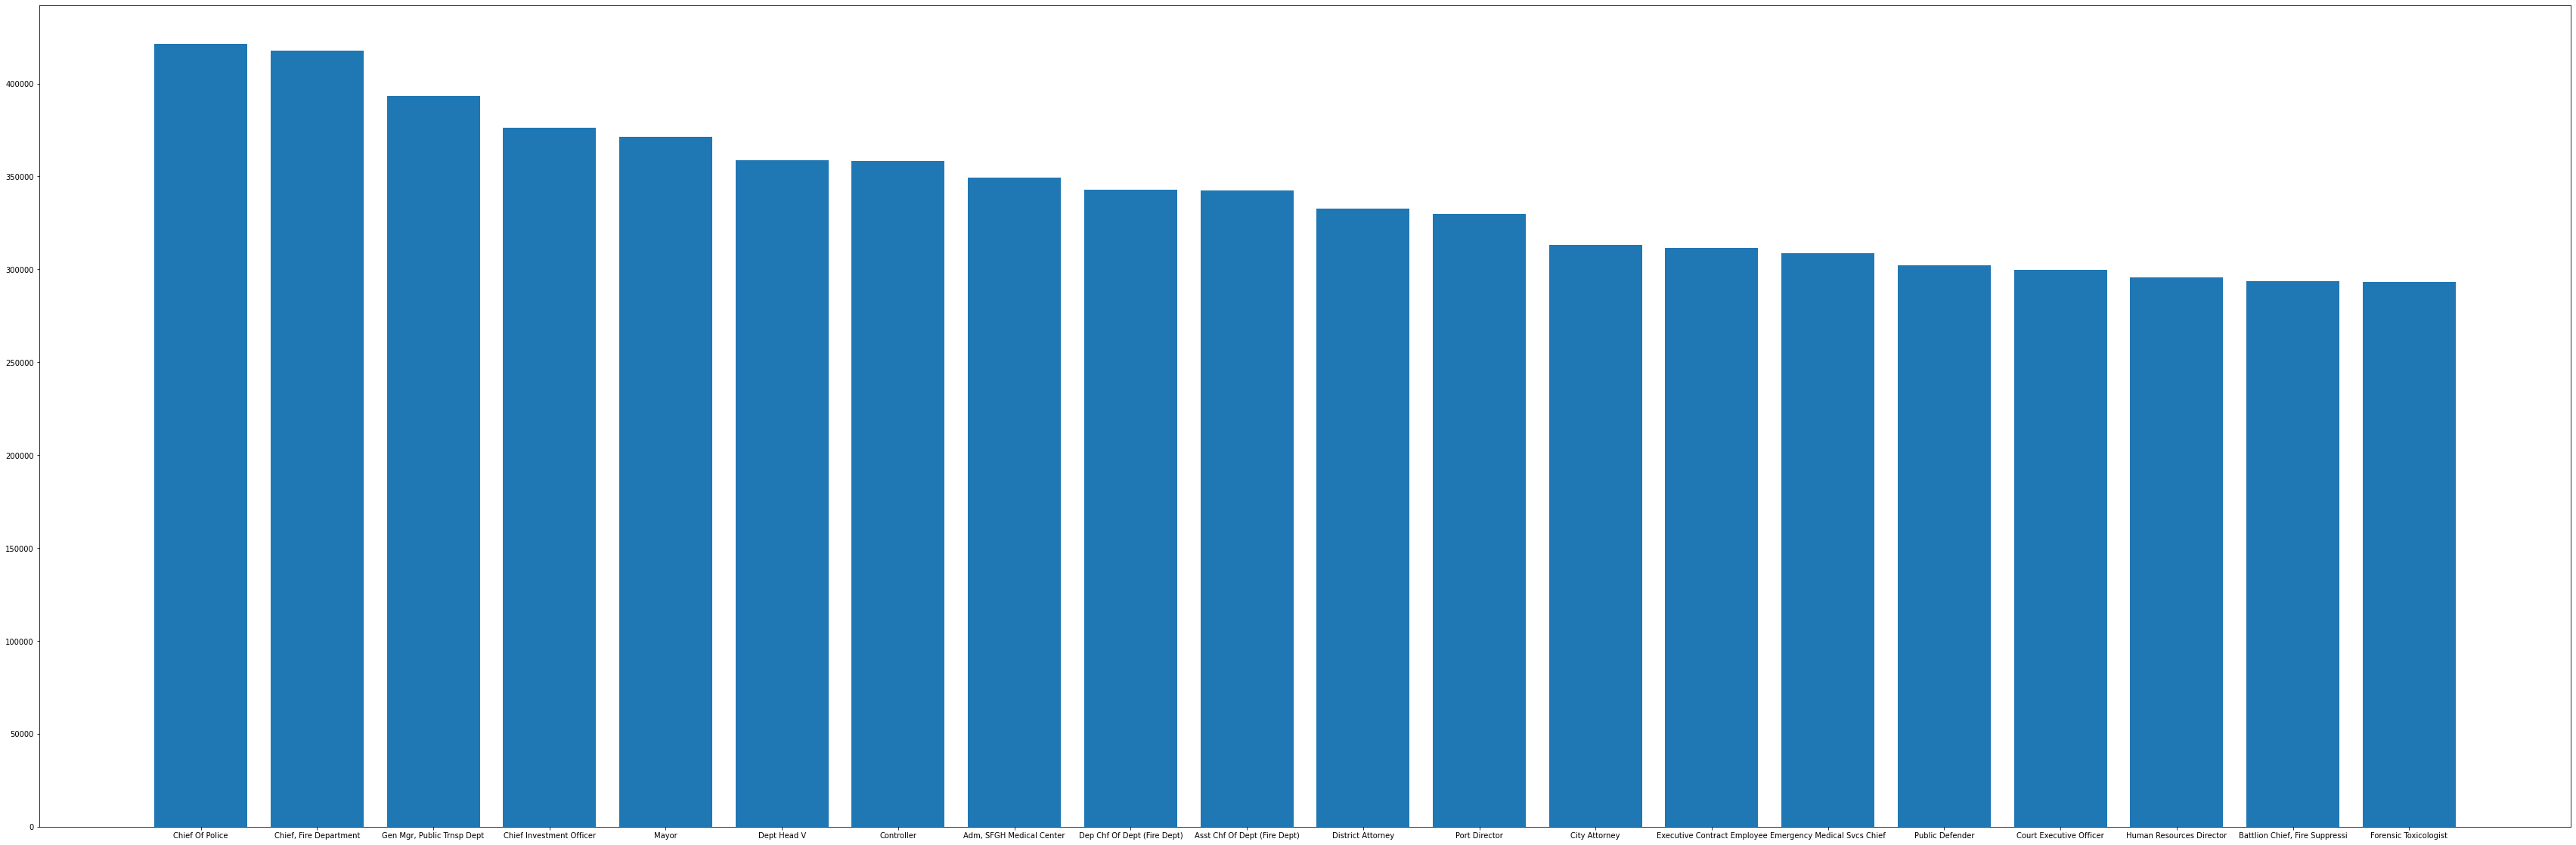

In [34]:
fig = plt.figure(figsize =(60, 20))

jobDF = df2[['Job','Total_Compensation']].groupby('Job').agg(avg('Total_Compensation').alias("Average Compensation")).sort(desc("Average Compensation")).toPandas().head(20)
# display the top 10 organisation group 
plt.bar(jobDF["Job"], jobDF["Average Compensation"])

In [35]:
#Chief of police is the top compensating Job from above.

#### 5.3. Check Correlation of Target Variable with Other Independent Variables. Plot Heatmap

In [36]:
#converting the dataframe to pandas dataframe
df3=df2.toPandas()

In [37]:
#checking the data
df3.head()

,Year_Type,Organization_Group,Department,Union,Job_Family,Job,Salaries,Overtime,Other_Salaries,Retirement,Health_Dental,Other_Benefits,Total_Compensation
0,Fiscal,Public Protection,District Attorney,Municipal Attorneys' Association,Legal & Court,Attorney (Civil/Criminal),114473.16,0.0,1500.00,21025.98,13068.80,9368.71,159436.65
1,Calendar,Culture & Recreation,Arts Commission,"SEIU - Miscellaneous, Local 1021","Budget, Admn & Stats Analysis",Senior Management Assistant,84077.11,0.0,0.00,16587.30,12457.73,6931.91,120054.05
2,Calendar,Community Health,Public Health,"SEIU - Human Services, Local 1021",Human Services,Eligibility Worker,9980.17,0.0,798.43,0.00,2254.93,835.11,13868.64
3,Fiscal,Community Health,Public Health,"SEIU - Health Workers, Local 1021",Medical & Dental,Dental Aide,2873.41,0.0,0.00,0.00,622.63,222.46,3718.50
4,Fiscal,Culture & Recreation,Recreation and Park Commission,"SEIU - Miscellaneous, Local 1021",Recreation,Recreation Leader,6701.85,0.0,176.70,0.00,2711.66,538.43,10128.64


In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290346 entries, 0 to 290345
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year_Type           290346 non-null  object 
 1   Organization_Group  290346 non-null  object 
 2   Department          290346 non-null  object 
 3   Union               290346 non-null  object 
 4   Job_Family          290346 non-null  object 
 5   Job                 290346 non-null  object 
 6   Salaries            290346 non-null  float64
 7   Overtime            290346 non-null  float64
 8   Other_Salaries      290346 non-null  float64
 9   Retirement          290346 non-null  float64
 10  Health_Dental       290346 non-null  float64
 11  Other_Benefits      290346 non-null  float64
 12  Total_Compensation  290346 non-null  float64
dtypes: float64(7), object(6)
memory usage: 28.8+ MB


In [39]:
from sklearn.preprocessing import LabelEncoder
objcols=['Year_Type','Organization_Group','Department','Union','Job_Family','Job']
le = LabelEncoder()
df3[objcols] = df3[objcols].apply(LabelEncoder().fit_transform)


In [40]:
df3.head()

,Year_Type,Organization_Group,Department,Union,Job_Family,Job,Salaries,Overtime,Other_Salaries,Retirement,Health_Dental,Other_Benefits,Total_Compensation
0,1,5,19,33,25,116,114473.16,0.0,1500.00,21025.98,13068.80,9368.71,159436.65
1,0,1,3,58,7,889,84077.11,0.0,0.00,16587.30,12457.73,6931.91,120054.05
2,0,0,45,57,21,381,9980.17,0.0,798.43,0.00,2254.93,835.11,13868.64
3,1,0,45,56,29,306,2873.41,0.0,0.00,0.00,622.63,222.46,3718.50
4,1,1,47,58,46,831,6701.85,0.0,176.70,0.00,2711.66,538.43,10128.64


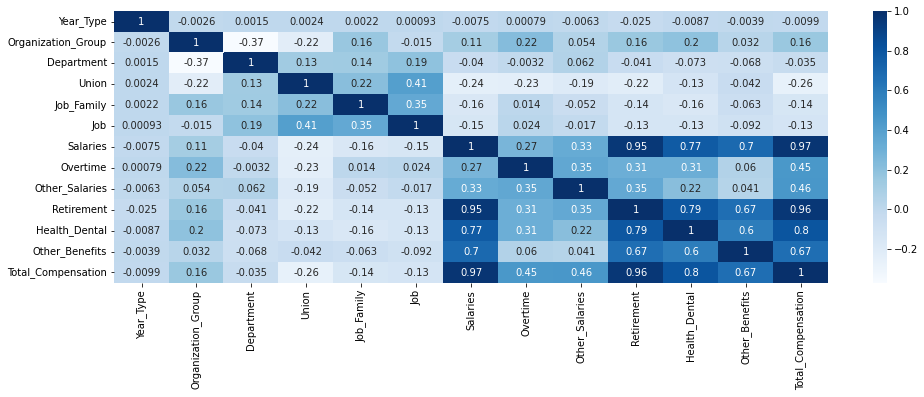

In [41]:
#plotting heat map from seaborn using pandas dataframe
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
corr = df3.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

### 6. Perform necessary data pre-processing and divide the data into train and test set

### 6.1 Categorise the attributes into its type (Use one hot encoding wherever required)

In [42]:
df2.printSchema()

root
 |-- Year_Type: string (nullable = true)
 |-- Organization_Group: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job_Family: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other_Salaries: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health_Dental: double (nullable = true)
 |-- Other_Benefits: double (nullable = true)
 |-- Total_Compensation: double (nullable = true)



In [43]:
catcols=[]
for col_name in df2.dtypes:
  # print(col_name)
  if col_name[1] == 'string':
    catcols.append(col_name[0])
print(catcols)

['Year_Type', 'Organization_Group', 'Department', 'Union', 'Job_Family', 'Job']


In [44]:
from pyspark.ml.feature import StringIndexer
my_dict = {}

stringindexerobjs = []

stringindexeroutputnames = []
oheoutputnames = []

for col_name in catcols:
    my_dict[col_name+"_index_obj"] = StringIndexer() \
    .setHandleInvalid("skip") \
    .setInputCol(col_name) \
    .setOutputCol(col_name+"_indexed")
    
    stringindexerobjs.append(my_dict.get(col_name+"_index_obj"))
    stringindexeroutputnames.append(col_name+"_indexed")
    oheoutputnames.append(col_name+"_ohe")


In [45]:
print(oheoutputnames)
print(len(oheoutputnames))
print(stringindexeroutputnames)
print(len(stringindexeroutputnames))

['Year_Type_ohe', 'Organization_Group_ohe', 'Department_ohe', 'Union_ohe', 'Job_Family_ohe', 'Job_ohe']
6
['Year_Type_indexed', 'Organization_Group_indexed', 'Department_indexed', 'Union_indexed', 'Job_Family_indexed', 'Job_indexed']
6


In [46]:
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import VectorAssembler

In [47]:
encoder = OneHotEncoder() \
.setInputCols(stringindexeroutputnames) \
.setOutputCols(oheoutputnames)


In [48]:
print(doublecols)
print(oheoutputnames)
print(len(df2.columns))

['Salaries', 'Overtime', 'Other_Salaries', 'Retirement', 'Health_Dental', 'Other_Benefits', 'Total_Compensation']
['Year_Type_ohe', 'Organization_Group_ohe', 'Department_ohe', 'Union_ohe', 'Job_Family_ohe', 'Job_ohe']
13


In [49]:
assembler = VectorAssembler() \
.setHandleInvalid("skip") \
.setInputCols(doublecols+oheoutputnames) \
.setOutputCol("unscaled_features")

In [50]:
from pyspark.ml.feature import StandardScaler

In [51]:
scaler = StandardScaler() \
.setInputCol("unscaled_features") \
.setOutputCol("features")

In [52]:
targetcol=['Total_Compensation']

In [53]:
from pyspark.ml.regression import LinearRegression
estimator = LinearRegression(featuresCol='features',labelCol = targetcol[0], maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [54]:
from pyspark.ml import Pipeline

In [55]:
pipeline_obj = Pipeline().setStages(stringindexerobjs + [encoder, assembler, scaler, estimator])

### 6.2 Split the data into train and test set

In [56]:
train_df, test_df = df2.randomSplit([.8, .2], seed =142)

In [57]:
print(train_df.count())

232082


In [58]:
print(test_df.count())

58264


### 7. Fit Linear Regression model on the data and check its performance

In [59]:
pipeline_model = pipeline_obj.fit(train_df)

In [60]:
predictiondf = pipeline_model.transform(test_df)

In [61]:
predictiondf.select("Total_Compensation", "prediction").show()

+------------------+------------------+
|Total_Compensation|        prediction|
+------------------+------------------+
|         124607.74|126418.71007364374|
|         155018.23|157445.57176821982|
|         156641.66|  157122.121598074|
|          24468.48|   18936.529547949|
|            198.54|-130.3169819146309|
|           1290.48| 683.0309752338887|
|           1340.12| 720.0141522932047|
|            211.04|1862.8492935136003|
|          77101.69| 77050.97351154123|
|         139747.94|138661.89106379196|
|         352931.01| 343743.8199214448|
|         422799.94|  421518.315437618|
|         115875.92| 119157.2337563161|
|          38412.91|43888.297192826096|
|         229539.07|228762.17191448997|
|          98180.31| 99984.68131269675|
|         118337.82|118265.41818808038|
|         158915.01| 160311.4188481508|
|         163201.87|163250.00981100783|
|         170283.42|172994.13573256097|
+------------------+------------------+
only showing top 20 rows



### 8. Fit Decision Tree Regression model on the data and check its performance (Optional)

In [62]:
from pyspark.ml.regression import DecisionTreeRegressor
dtestimator = DecisionTreeRegressor(featuresCol ='features', labelCol = 'Total_Compensation')


In [63]:
pipeline_obj = Pipeline().setStages(stringindexerobjs + [encoder, assembler, scaler, dtestimator])

In [64]:
pipeline_model = pipeline_obj.fit(train_df)

In [65]:
predictiondf = pipeline_model.transform(test_df)

In [66]:
predictiondf.select("Total_Compensation", "prediction").show()

+------------------+------------------+
|Total_Compensation|        prediction|
+------------------+------------------+
|         124607.74|124786.42368582175|
|         155018.23| 158904.7069001751|
|         156641.66| 158904.7069001751|
|          24468.48|25114.271799234928|
|            198.54|1729.0780170031867|
|           1290.48|1729.0780170031867|
|           1340.12|1729.0780170031867|
|            211.04|1729.0780170031867|
|          77101.69| 80343.10402679513|
|         139747.94|142935.75163453093|
|         352931.01|272406.47034278454|
|         422799.94|272406.47034278454|
|         115875.92|116724.54061142069|
|          38412.91| 42901.99468806924|
|         229539.07|230090.02388075754|
|          98180.31|100242.64484460447|
|         118337.82|116724.54061142069|
|         158915.01| 158904.7069001751|
|         163201.87| 167517.4797662149|
|         170283.42| 167517.4797662149|
+------------------+------------------+
only showing top 20 rows



### Model Persistence (Optional)
Model persistence means saving your model to a disk. After you finalize your model for prediction depending upon the performance, you need to save the model to the disk. Let's say, you finalize 'lrmodel' to be used for in production environment i.e. in your application. We use the following code to save it.

##### Saving the model

In [67]:
# use save() method to save the model
# write().overwrite() is usually used when you want to replace the older model with a new one
# It might happen that you wish to retrain your model and save it at the same the place
pipeline_model.write().overwrite().save("/models/dtmodel")

##### Loading the model

In [68]:
# import PipelineModel from pyspark.ml package
from pyspark.ml import PipelineModel

# load the model from the location it is stored
# The loaded model acts as PipelineModel
pipemodel = PipelineModel.load("/models/dtmodel")

# use the PipelineModel object to perform prediciton on test data. 
# Use .transform() to perfrom prediction
prediction = pipemodel.transform(test_df)

# print the results
prediction.select('Total_Compensation', 'prediction').show(5)

+------------------+------------------+
|Total_Compensation|        prediction|
+------------------+------------------+
|         124607.74|124786.42368582175|
|         155018.23| 158904.7069001751|
|         156641.66| 158904.7069001751|
|          24468.48|25114.271799234928|
|            198.54|1729.0780170031867|
+------------------+------------------+
only showing top 5 rows

